In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [0]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/SIFT/images'
i=0

for i in dataset_path:
 i=i+1 

img_building = cv2.imread(os.path.join(dataset_path, 'quaid-e-azam 3.jpg'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

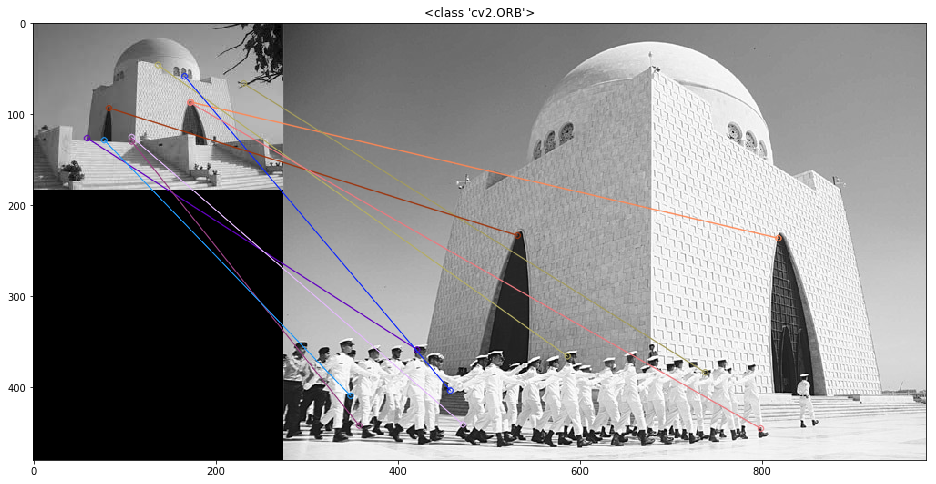

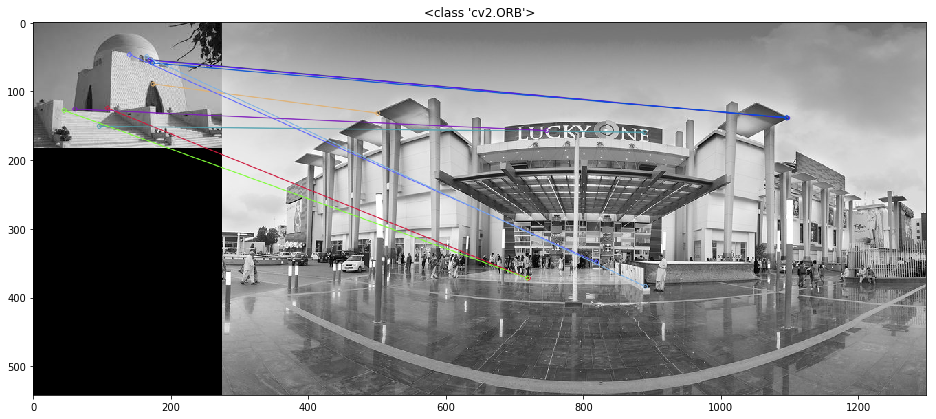

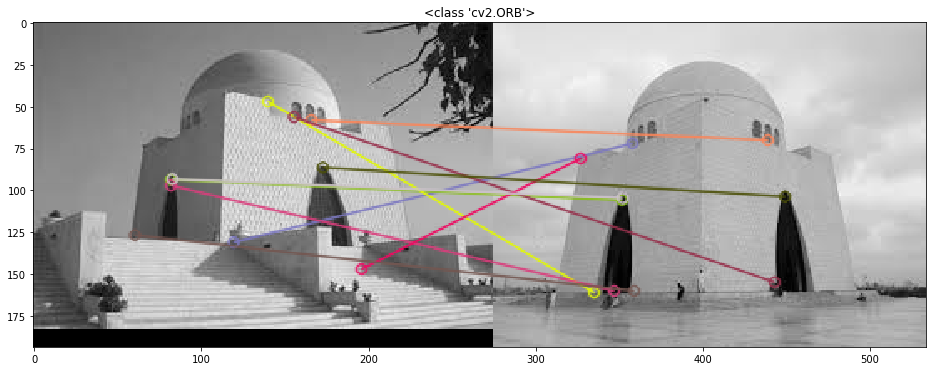

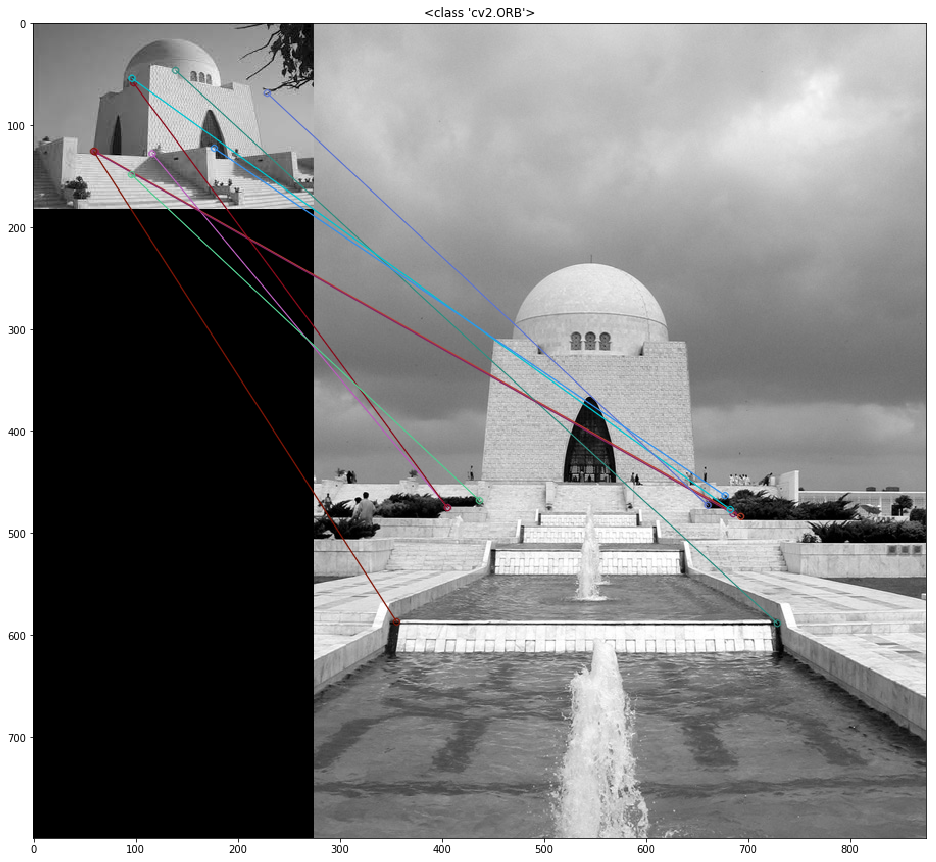

In [83]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, 'quaid-e-azam 3.jpg', 'quaid-e-azam2.jpg')
draw_image_matches(orb, 'quaid-e-azam 3.jpg', 'lucky-one (1).jpg')
draw_image_matches(orb, 'quaid-e-azam 3.jpg', 'quaid-e-azam 4.jpg')
draw_image_matches(orb, 'quaid-e-azam 3.jpg', 'quaid-eazam.jpg')

In [0]:
#from cv2 import xfeatures2d
#!pip uninstall opencv-python==4.1.0.25
#!pip uninstall opencv-python-contrib
#import opencv-master

#!pip install opencv-python==3.4.2.16

#!pip install opencv-contrib-python==3.4.2.16

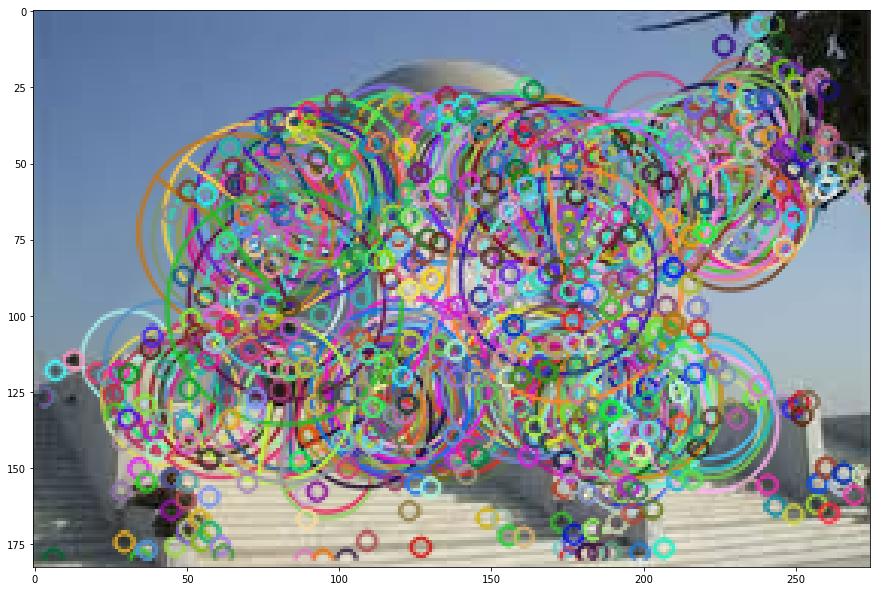

In [8]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img_building, None)
img_kp = cv2.drawKeypoints(img_building, kp, img_building)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp); plt.show()



```
ADDITION
```



In [9]:
print(cv2.__version__)

import cv2

#help(cv2.xfeatures2d)

3.4.2


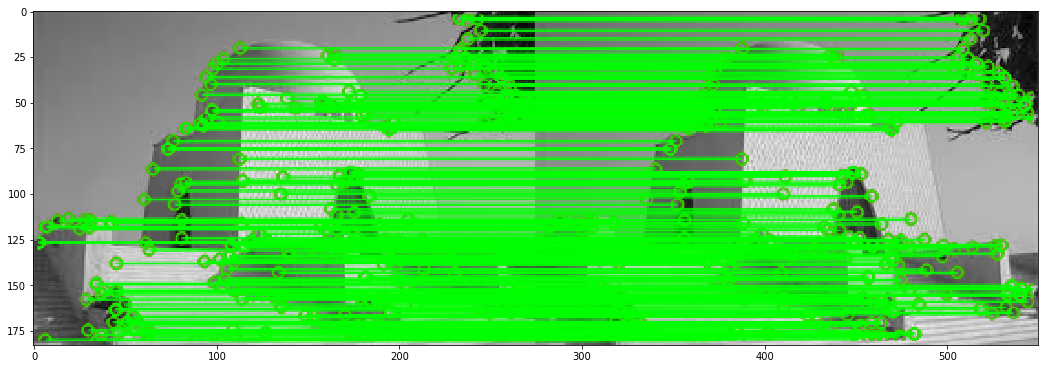

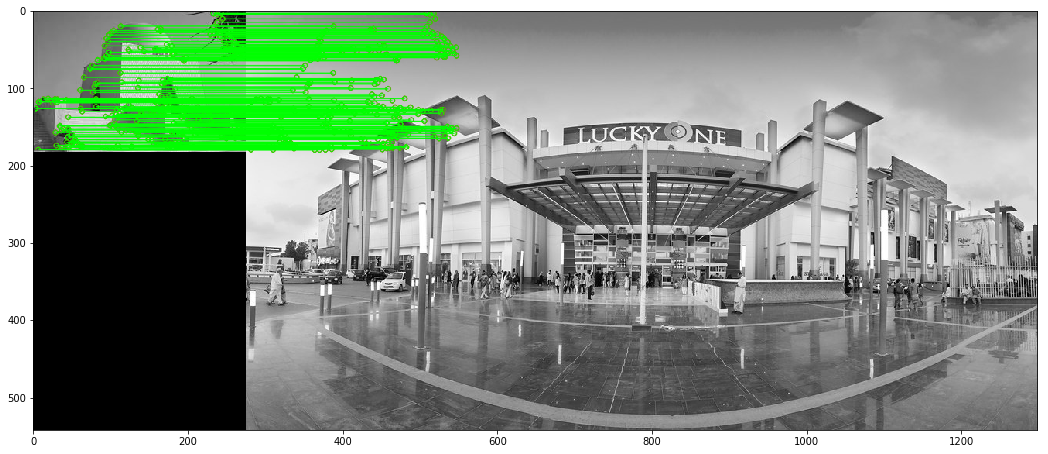

'plt.figure(figsize=(18, 18))\nplt.imshow(show_img3); plt.show()'

In [85]:
img1, kp1, des1 = image_detect_and_compute(sift, 'quaid-e-azam 3.jpg')
img2, kp2, des2 = image_detect_and_compute(sift, 'quaid-e-azam 3.jpg')

#img3, kp1, des1 = image_detect_and_compute(sift, 'quaid-e-azam 3.jpg')
#img4, kp2, des2 = image_detect_and_compute(sift, 'lucky-one (1).jpg')

'''
img5, kp1, des1 = image_detect_and_compute(sift, 'quaid-e-azam 3.jpg')
img6, kp2, des2 = image_detect_and_compute(sift, 'quaid-e-azam 5.jpg')'''

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.55*n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

Show_img1 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
show_img2 = cv2.drawMatchesKnn(img3, kp1, img4, kp2, matches, None, **draw_params)
#show_img3 = cv2.drawMatchesKnn(img5, kp1, img6, kp2, matches, None, **draw_params)'''

plt.figure(figsize=(18, 18))
plt.imshow(Show_img1); plt.show()

plt.figure(figsize=(18, 18))
plt.imshow(show_img2); plt.show()

'''plt.figure(figsize=(18, 18))
plt.imshow(show_img3); plt.show()'''

***In  percentage***

In [7]:
import cv2

original = cv2.imread("/content/drive/My Drive/Colab Notebooks/SIFT/images-resize/quaid-e-azam 3.jpg")
image_to_compare = cv2.imread("/content/drive/My Drive/Colab Notebooks/SIFT/images-resize/quaid-e-azam2.jpg")
original2= cv2.imread("/content/drive/My Drive/Colab Notebooks/SIFT/images-resize/quaid-e-azam 4.jpg")
image_to_compare2= cv2.imread("/content/drive/My Drive/Colab Notebooks/SIFT/images-resize/quaid-e-azam 5.jpg")



if original.shape == image_to_compare.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(original, image_to_compare)
    b, g, r = cv2.split(difference)

    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print("The images are completely Equal")
    else:
        print("The images are NOT equal")
        
        
sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)
kp_3, desc_3 = sift.detectAndCompute(original2, None)
kp_4, desc_4 = sift.detectAndCompute(image_to_compare2, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)
matches2 = flann.knnMatch(desc_3, desc_4, k=2)

good_points = []
for m, n in matches:
    if m.distance < 0.9*n.distance:
        good_points.append(m)

# Define how similar they are
number_keypoints = 0
if len(kp_1) <= len(kp_2):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)
    
if len(kp_3) <= len(kp_4):
    number_keypoints = len(kp_3)
else:
    number_keypoints = len(kp_4)


print("Keypoints 1ST Image: " + str(len(kp_1)))
print("Keypoints 2ND Image: " + str(len(kp_2)))
print("Keypoints 3rd Image: " + str(len(kp_3)))
print("Keypoints 4th Image: " + str(len(kp_4)))
print("GOOD Matches:", len(good_points))
print("How good it's the match: ", len(good_points) / number_keypoints * 100)
average= len(kp_1 + kp_2 + kp_3+ kp_4)*400/400
average=len(good_points)/2
print("Average", average)

result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)
#result1 = cv2.drawMatches(original2, kp_3, image_to_compare2, kp_4, good_points, None)

'''from google.colab.patches import cv2_imshow
cv2_imshow("result", cv2.resize(result, None, fx=0.4, fy=0.4))
cv2.imwrite("feature_matching.jpg", result)


cv2.imshow("Original", cv2.resize(original, None, fx=0.4, fy=0.4))
cv2.imshow("Duplicate", cv2.resize(image_to_compare, None, fx=0.4, fy=0.4))
cv2.waitKey(0)
cv2.destroyAllWindows()'''

The images have same size and channels
The images are NOT equal
Keypoints 1ST Image: 1393
Keypoints 2ND Image: 975
Keypoints 3rd Image: 379
Keypoints 4th Image: 1039
GOOD Matches: 297
How good it's the match:  78.3641160949868
Average 148.5


'from google.colab.patches import cv2_imshow\ncv2_imshow("result", cv2.resize(result, None, fx=0.4, fy=0.4))\ncv2.imwrite("feature_matching.jpg", result)\n\n\ncv2.imshow("Original", cv2.resize(original, None, fx=0.4, fy=0.4))\ncv2.imshow("Duplicate", cv2.resize(image_to_compare, None, fx=0.4, fy=0.4))\ncv2.waitKey(0)\ncv2.destroyAllWindows()'